In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split #트레인, 테스트 데이터 분류 
from sklearn.svm import SVC #SVC 서포트 벡터 머신 라이브러리(분류화)
from sklearn.svm import LinearSVC #학습방법 SVM(분류, 회귀) -> SVC는 Classfier(분류) -> 전류도 판단
from sklearn.metrics import accuracy_score, classification_report  #metrics 는 confusion metrics 의 라이브러리 : accuracy/recall/precision 등 모델 평가
from sklearn.neighbors import KNeighborsClassifier #KNN 분류 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

## 1. 와인판별

In [279]:
#와인 상관관계 분석
#데이터프레임 내의 각 항목간의 상관관계를 분석
#요구사항 : 함수 5개이상 사용, 그래프 2개
#훈련, 검증, KNN, 정답률 계산, 모델 테스트 -> 갈무리

##### 목적 : 와인 피처를 통해, 와인의 Quality를 맞춰보장!

In [280]:
wine_data = pd.read_csv('wine.csv', encoding='UTF-8')

In [281]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8,1
1595,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8,1
1596,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,1
1597,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,1


In [282]:
wine_data.describe() #와인 데이터 간단 산술적 묘사

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [283]:
wine_data['quality'].value_counts() #와인 Quality 별 카운트

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

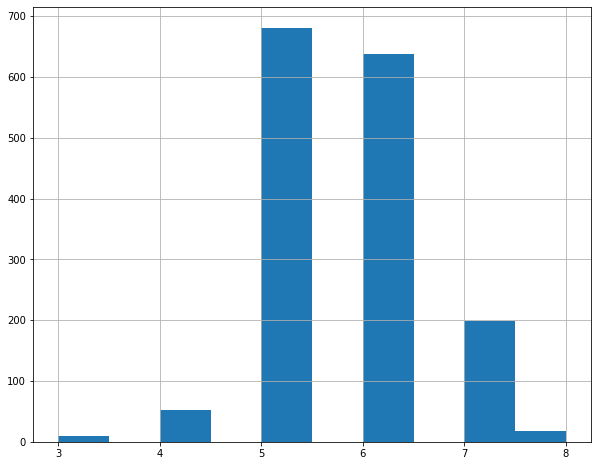

In [284]:
#와인 quality 질 별 그래프
wine_data['quality'].hist(bins=10, figsize=(10,8))

### 1-1. 와인 상관관계 분석

In [285]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


### 1-2 : Fixed Acidity(산도)와 PH(산성도)은 높은(-0.68)의 음의 상관관계를 가진다.
### 1-2 : Fixed Acidity와 Citric acid(신맛을 내는 산도)는 높은 양의 상관관계를 가진다.
### 1-2 : Quality는 3 ~ 8등급까지 존재하며, Class는 0 ~ 1이 존재. 둘은 높은 양의 상관관계(0.84)를 갖는다.

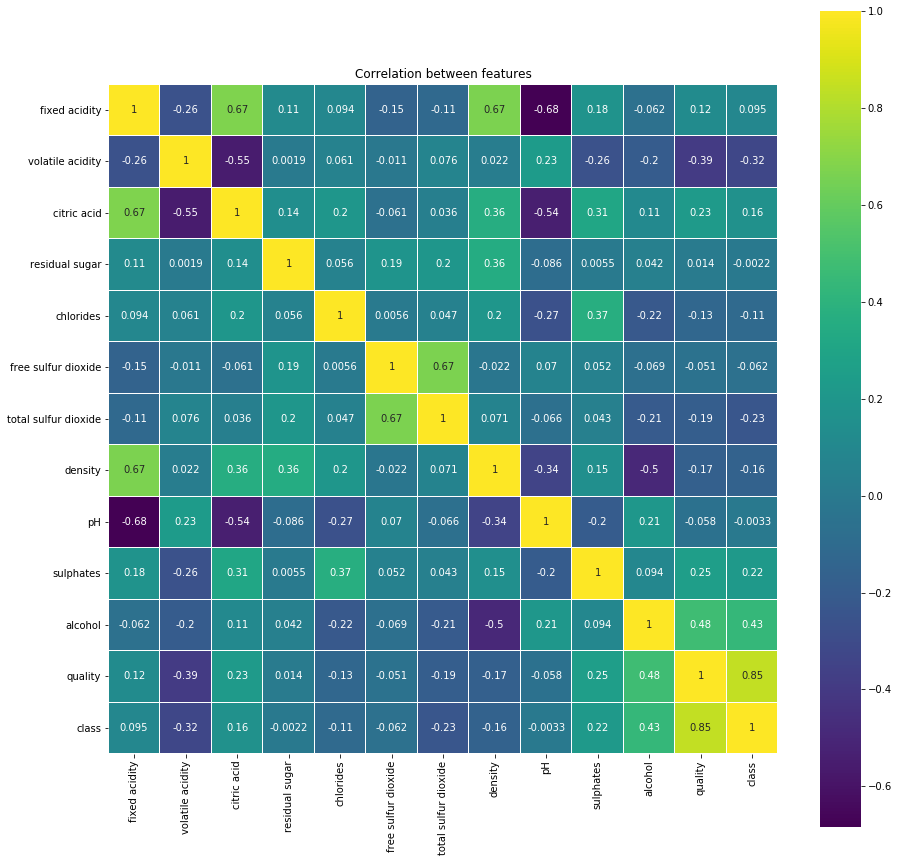

In [286]:
#히트맵 -> 상관도 시각화

plt.figure(figsize=(15, 15))
sns.heatmap(wine_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## 학습 피처 : fixed acidity, citric acid, residual sugar, density, pH, alcohol, class
## 정답 레이블 : quality

In [287]:
x = wine_data.loc[:,['fixed acidity','citric acid', 'residual sugar', 'density', 'pH', 'alcohol', 'class']] #피처 = 파라미터

In [288]:
y= wine_data.loc[:,['quality']] #피처 = 파라미터

In [289]:
x

,fixed acidity,citric acid,residual sugar,density,pH,alcohol,class
0,11.6,0.66,2.20,1.00080,3.25,9.0,0
1,10.4,0.49,2.10,0.99940,3.16,8.4,0
2,7.4,0.00,4.25,0.99660,3.63,10.7,0
3,10.4,0.42,1.50,0.99832,3.38,9.9,0
4,8.3,0.02,3.40,0.99892,3.48,11.0,0
...,...,...,...,...,...,...,...
1594,8.6,0.39,1.80,0.99516,3.35,11.7,1
1595,5.5,0.03,1.80,0.99080,3.50,14.0,1
1596,7.2,0.33,1.70,0.99600,3.23,10.0,1
1597,7.2,0.31,2.00,0.99472,3.23,11.3,1


In [290]:
y

,quality
0,3
1,3
2,3
3,3
4,3
...,...
1594,8
1595,8
1596,8
1597,8


In [291]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8, shuffle = True)
#트레인(머신러닝 학습), 테스트(모델에 입증 데이터), 트레인 검증(머신러닝 학습 정답 데이터), 테스트 검증(모델이 맞춰야 할 데이터)

## 1-3 : 머신러닝 훈련 데이터 Split

In [292]:
x_train #머신러닝 훈련 데이터

,fixed acidity,citric acid,residual sugar,density,pH,alcohol,class
1193,7.6,0.31,1.70,0.99716,3.46,9.5,1
903,11.9,0.65,2.15,0.99880,3.06,11.3,1
179,8.8,0.14,2.40,0.99690,3.19,9.5,0
61,6.8,0.06,2.00,0.99592,3.53,10.9,0
810,7.2,0.00,1.90,0.99675,3.37,9.0,1
...,...,...,...,...,...,...,...
686,8.4,0.40,1.70,0.99603,3.39,10.5,0
228,9.9,0.07,3.40,1.00015,3.31,9.8,0
1275,6.6,0.02,2.40,0.99387,3.38,12.6,1
250,7.7,0.00,2.40,0.99740,3.27,9.3,0


In [293]:
y_train #머신러닝 훈련 데이터 정답

,quality
1193,6
903,6
179,5
61,4
810,6
...,...
686,5
228,5
1275,6
250,5


In [294]:
x_test #모델 테스트 데이터

,fixed acidity,citric acid,residual sugar,density,pH,alcohol,class
317,9.3,0.24,2.1,0.99660,3.12,9.9,0
462,7.4,0.12,1.9,0.99702,3.26,9.2,0
381,8.6,0.11,2.3,0.99790,3.40,9.9,0
362,9.9,0.45,2.3,0.99910,3.39,9.4,0
16,5.0,0.04,1.4,0.99380,3.75,10.5,0
...,...,...,...,...,...,...,...
58,6.7,0.08,2.3,0.99648,3.52,11.0,0
1090,9.0,0.52,2.1,0.99568,3.31,11.3,1
1023,9.2,0.10,3.0,0.99888,3.31,9.5,1
1503,7.5,0.30,2.2,0.99495,3.44,11.5,1


In [295]:
y_test #모델 테스트 데이터의 정답

,quality
317,5
462,5
381,5
362,5
16,4
...,...
58,4
1090,6
1023,6
1503,7


## 1-4 : KNN 최근접 방식으로 머신러닝 학습화 및 Label 예측

In [296]:
#Knn 최근접 방식으로 머신러닝 학습화, 근처 이웃 7개 지정
knn = KNeighborsClassifier(n_neighbors=7)

#훈련 데이터 -> 훈련 검증 데이터

knn.fit(x_train, y_train)
#KNN 변수에 x_train(학습) 데이터로 fit 시켜 y_train의 정답을 맞추도록 학습화시킴

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [297]:
y_pred = knn.predict(x_test) 
#테스트 데이터 -> 테스트 데이터(x_test) 를 입력시켜, y_pred 안에 학습화 된 모델의 정답을 예측

In [298]:
y_pred #x_test를 통해 -> 머신러닝이 예측한 와인의 Quality 정답 데이터

array([5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 5, 7, 5, 6, 6, 5, 6, 5,
       6, 5, 7, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 7, 6, 7, 5,
       5, 6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5,
       7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 7, 6, 5, 7, 7, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6,
       6, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 7, 7, 6, 5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 6, 6,
       6, 5, 5, 6, 6, 7, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 5,

In [299]:
#3. 내 훈련 데이터 정답 = y_test와, 내 훈련(train) 데이터로 학습된 정답(y_pred) 의 정답률 비교
print('정답률= ', accuracy_score(y_test, y_pred)) #y_test = 머신러닝 학습화 모델이 맞출 문제들, y_pred = 훈련 모델이 학습하여 y_test를 넣어 나온 답안 = y_pred

정답률=  0.796875


## 1-4 : 와인 소몰리에 테스트

In [300]:
#와인 소몰리에 테스트 :/ fixed acidity, citric acid, residual sugar, density, pH, alcohol, class 를 넣어 예측해보자
white = [8.3, 0.12, 1.7, 0.995, 3.22, 9.5, 1]

test = knn.predict_proba([white])
#와인 테스트

In [301]:
print(test)
#4번째 인덱스에 정확도 1을 보임.
#4번째 인덱스의 Quallity는 3,4,5,6,7,8 이기때문에 6등급일 확률이 100%이다.

[[0. 0. 0. 1. 0. 0.]]


In [302]:
#와인 소몰리에 테스트 :/ fixed acidity, citric acid, residual sugar, density, pH, alcohol, class 를 넣어 예측해보자
red = [1, 1, 1.7, 0.995, 3.22, 9.5, 1]

test = knn.predict_proba([red])
print(test)
#와인 테스트

[[0.         0.28571429 0.57142857 0.14285714 0.         0.        ]]


In [303]:
#red의 등급 테스트는 4 등급 or 5등급이다. 허나, 5등급이 70%의 확률로 높다.

In [304]:
classification_report(y_test, y_pred)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         3\n           4       0.00      0.00      0.00        12\n           5       0.90      0.98      0.94       133\n           6       0.76      0.88      0.82       124\n           7       0.50      0.36      0.42        45\n           8       0.00      0.00      0.00         3\n\n    accuracy                           0.80       320\n   macro avg       0.36      0.37      0.36       320\nweighted avg       0.74      0.80      0.76       320\n'

## 2번 : BMI : -----------------------------------------------------------------------------------------------  ##

## 2. 키와 몸무게를 활용한 비만도(BMI) 예측

In [305]:
bmi_data = pd.read_csv('bmi.csv', encoding='UTF-8')

In [306]:
bmi_data

,height,weight,label
0,185,45,1
1,167,37,1
2,191,79,2
3,122,73,3
4,182,62,2
...,...,...,...
19995,157,55,2
19996,170,64,2
19997,144,60,3
19998,184,42,1


In [307]:
bmi_data.describe() #비만도 데이터 묘사

,height,weight,label
count,20000.000000,20000.000000,20000.000000
mean,159.928600,57.532850,2.064600
std,23.471296,13.264759,0.837294
min,120.000000,35.000000,1.000000
25%,140.000000,46.000000,1.000000
50%,160.000000,57.000000,2.000000
75%,180.000000,69.000000,3.000000
max,200.000000,80.000000,3.000000


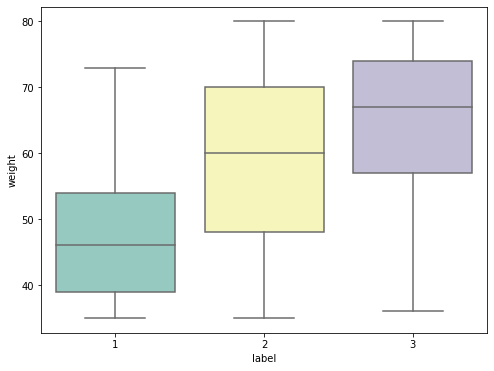

In [308]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="weight", data=bmi_data, palette="Set3")
plt.show()

In [309]:
#1. label 1,2,3 의 '몸무게' 4분위수 차이
#설명 : Label 이 높을수록, 몸무게가 대체적으로 상승하는것을 볼 수 있다.

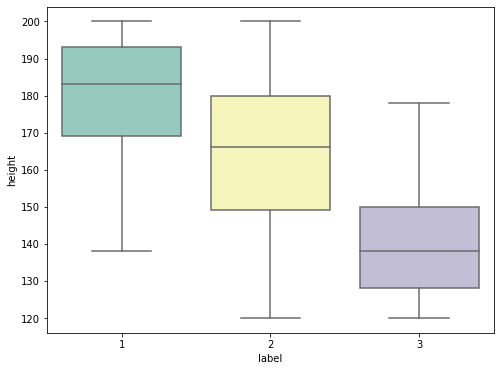

In [310]:
plt.figure(figsize=(8,6))
sns.boxplot(x="label", y="height", data=bmi_data, palette="Set3")
plt.show()

In [311]:
# 2. label 1,2,3 따라 '키'의 차이
# 설명 : 몸무게와는 반대되는 양상을 보이고 있다.
# 종합설명 : Label 이 높을수록 대체적으로 몸무게는 높고, 키는 작다.

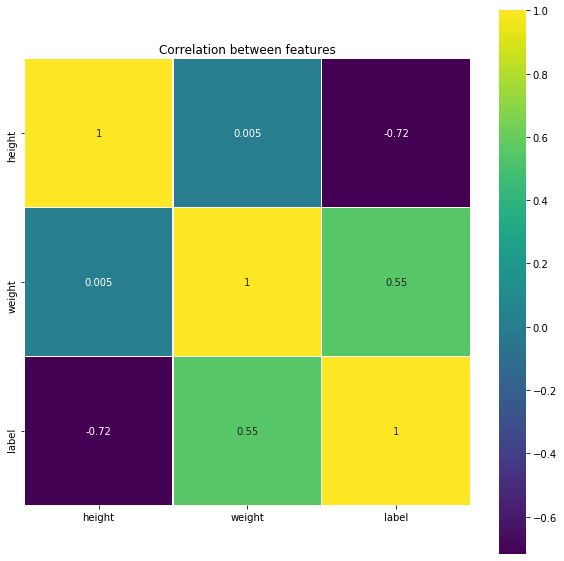

In [312]:
#히트맵 -> 상관도 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(bmi_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

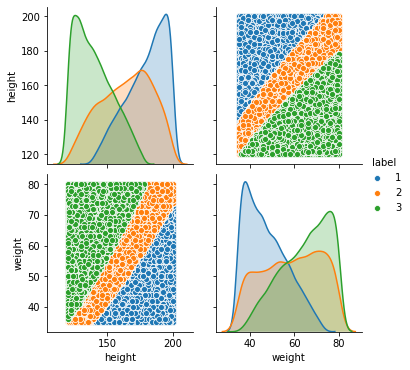

In [313]:
sns.pairplot(bmi_data, hue="label")
plt.show()

## 1. 키와 라벨은 강한 음의 상관관계 -> 키가 클수록 라벨은 낮아짐
## 2. 키와 몸무게는 상관관계가 낮다. 
## 3. 몸무게와 라벨은 보통의 상관관계를 갖는다.(0.5)

In [314]:
x2 = bmi_data.loc[:,['weight', 'height']] #피처 = 파라미터
y2 = bmi_data.loc[:,['label']]

In [315]:
x2 #학습 및 테스트 데이터

,weight,height
0,45,185
1,37,167
2,79,191
3,73,122
4,62,182
...,...,...
19995,55,157
19996,64,170
19997,60,144
19998,42,184


In [316]:
y2 #정답데이터

,label
0,1
1,1
2,2
3,3
4,2
...,...
19995,2
19996,2
19997,3
19998,1


## 학습, 학습정답, 테스트, 테스트데이터 분류

In [317]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.2, train_size = 0.8, shuffle = True)
#트레인(머신러닝 학습), 테스트(모델에 입증 데이터), 트레인 검증(머신러닝 학습 정답 데이터), 테스트 검증(모델이 맞춰야 할 데이터)

In [318]:
x_train2

,weight,height
8020,67,141
9219,39,158
6639,77,160
9049,62,155
9130,39,140
...,...,...
13309,68,136
14378,54,173
10709,72,126
7529,58,149


In [319]:
x_test2

,weight,height
12330,37,148
4026,60,147
9955,70,184
11783,63,123
1741,78,144
...,...,...
362,62,166
9460,68,186
18998,48,164
9149,38,129


In [320]:
y_train2

,label
8020,3
9219,1
6639,3
9049,3
9130,2
...,...
13309,3
14378,1
10709,3
7529,3


In [321]:
y_test2

,label
12330,1
4026,3
9955,2
11783,3
1741,3
...,...
362,2
9460,2
18998,1
9149,2


In [411]:
#학습기(Estimator) 객체 생성, SVM 서포트 벡터 머신으로 선을 그려 비만도 등급(label) 을 예측함
clf2 = SVC() #객체생성 -> 선을 그릴 수 있는 (X,Y 파라미터 담을)
#clf 객체에 x_train(머신러닝 학습 데이터), y_train(머신러닝 정답 데이터) 를 학습시킴
clf2.fit(x_train2, y_train2)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [412]:
y_pred2 = clf2.predict(x_test2) 
#테스트 데이터 -> 테스트 데이터(x_test) 를 입력하여, y_pred 는 객체안에 자동차의 타입을 예측한 결과를 가지고 있음

In [413]:
y_pred2

array([1, 3, 2, ..., 1, 2, 3], dtype=int64)

In [414]:
#3. 내 훈련 데이터 정답 = y_test와, 내 훈련(train) 데이터로 학습된 정답(y_pred) 의 정답률 비교
print('정답률= ', accuracy_score(y_test2, y_pred2)) #y_test = 내가 맞춰야할 답안, y_pred = 훈련 모델로 학습되서 y_test를 넣어 나온 답안 = y_pred

정답률=  0.99425


In [415]:
x_test2

,weight,height
12330,37,148
4026,60,147
9955,70,184
11783,63,123
1741,78,144
...,...,...
362,62,166
9460,68,186
18998,48,164
9149,38,129


In [421]:
jiheon = [60, 180]
name = [30,140]
clf2.predict_proba([jiheon])
#왜 안되는지 모르겠음

AttributeError: predict_proba is not available when  probability=False

In [330]:
clf2.predict([name])

array([1], dtype=int64)

# 3. 목적 : School Data로 Label ( 1, 0 )Classfication

In [360]:
school_data = pd.read_csv('school.csv', encoding='UTF-8') #학교 데이터 불러오기

In [361]:
school_data

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1
...,...,...,...,...,...,...,...,...,...,...
2598,36.7,72.7,38.8,71.6,33.9,0,0.0,0.00,50.4,0
2599,46.2,27.7,39.6,59.7,77.1,0,0.0,0.00,47.7,0
2600,43.3,52.0,49.5,41.7,99.9,3879,4.6,0.00,46.2,0
2601,43.9,23.9,38.9,56.6,87.8,0,0.0,0.00,45.8,0


In [362]:
school_data.corr()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
teaching,1.000000,0.137571,0.913120,0.503867,0.306127,0.043559,-0.270348,0.273349,0.585123,0.762519
international,0.137571,1.000000,0.250562,0.324722,0.012195,-0.141406,0.060470,0.790759,0.081301,0.184758
research,0.913120,0.250562,1.000000,0.525264,0.357491,0.065745,-0.182574,0.334674,0.569877,0.767877
citations,0.503867,0.324722,0.525264,1.000000,0.042822,-0.071660,-0.129201,0.309218,0.251363,0.485385
income,0.306127,0.012195,0.357491,0.042822,1.000000,-0.031859,-0.005950,0.032428,0.148350,0.213245
num_students,0.043559,-0.141406,0.065745,-0.071660,-0.031859,1.000000,0.373442,-0.126749,0.019004,0.047271
student_staff_ratio,-0.270348,0.060470,-0.182574,-0.129201,-0.005950,0.373442,1.000000,-0.026489,-0.137670,-0.190075
international_students,0.273349,0.790759,0.334674,0.309218,0.032428,-0.126749,-0.026489,1.000000,0.153235,0.269819
total_score,0.585123,0.081301,0.569877,0.251363,0.148350,0.019004,-0.137670,0.153235,1.000000,0.722390
Label,0.762519,0.184758,0.767877,0.485385,0.213245,0.047271,-0.190075,0.269819,0.722390,1.000000


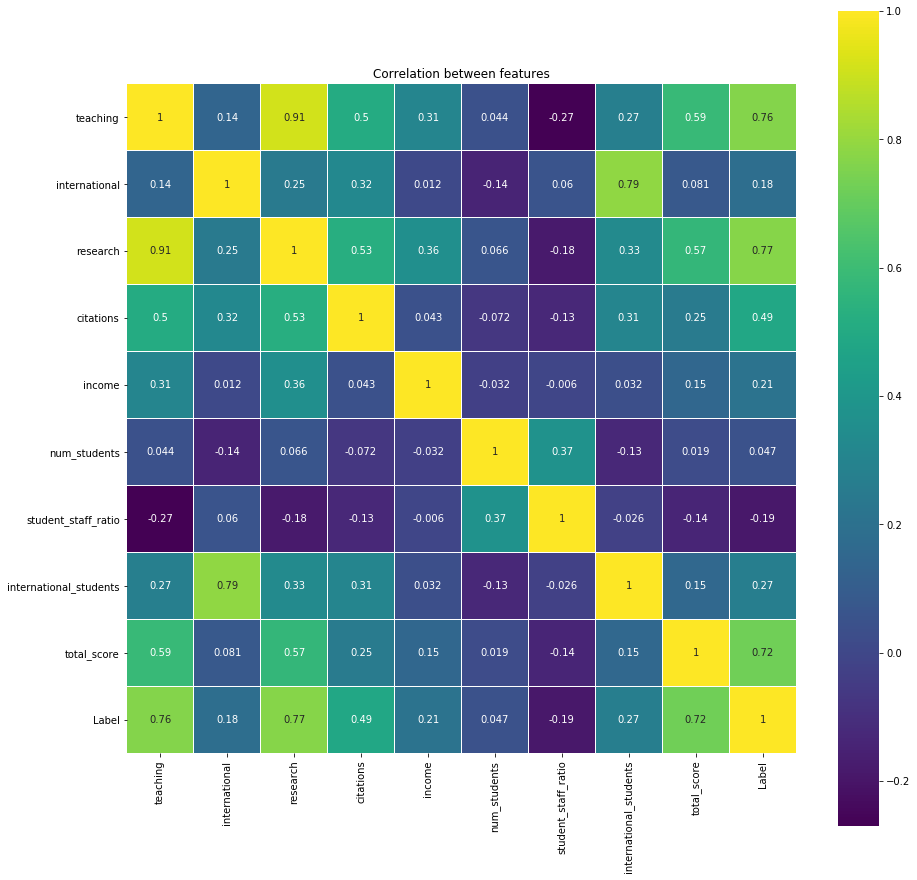

In [363]:
#히트맵 -> 상관도 시각화
plt.figure(figsize=(15, 15))
sns.heatmap(school_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## 1. Label 개/폐업 유무와 teaching(교육)의 상관도는 0.7로 높다.
## -> teaching 이 증가할수록, 1에 가까워짐 -> 교육 점수가 좋을수록 학교는 존속(=1)
## 2. Label 과 관련된 상관도는 Reasearch, total_score, citations  순으로 높다.
## 3. 피처는 label을 제외한 모든 피처(칼럼)으로 결정

In [386]:
x3 = school_data.iloc[:,0:9] #피처 = 파라미터
y3 = school_data.loc[:,['Label']]

In [387]:
x3

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0
...,...,...,...,...,...,...,...,...,...
2598,36.7,72.7,38.8,71.6,33.9,0,0.0,0.00,50.4
2599,46.2,27.7,39.6,59.7,77.1,0,0.0,0.00,47.7
2600,43.3,52.0,49.5,41.7,99.9,3879,4.6,0.00,46.2
2601,43.9,23.9,38.9,56.6,87.8,0,0.0,0.00,45.8


In [388]:
y3 #학교 존폐업 예측 

,Label
0,0
1,0
2,0
3,1
4,1
...,...
2598,0
2599,0
2600,0
2601,0


In [389]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3, test_size = 0.2, train_size = 0.8, shuffle = True)
#트레인(머신러닝 학습), 테스트(모델에 입증 데이터), 트레인 검증(머신러닝 학습 정답 데이터), 테스트 검증(모델이 맞춰야 할 데이터)

In [391]:
x_train3

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score
2180,28.2,47.1,25.5,55.5,34.2,9703,15.2,0.05,59.8
2420,40.7,29.1,10.4,63.3,32.4,7086,8.3,0.02,59.8
861,48.4,37.3,39.8,90.9,34.4,12338,4.5,0.18,57.4
993,18.9,68.7,16.1,35.0,34.5,27491,16.1,0.16,59.8
1909,69.5,27.5,69.5,58.2,78.7,22809,5.6,0.07,63.2
...,...,...,...,...,...,...,...,...,...
224,28.0,84.1,30.2,74.3,42.1,12938,15.8,0.33,47.1
919,22.4,76.9,21.9,66.8,30.0,32713,30.4,0.17,59.8
1766,61.8,21.1,56.5,40.0,75.0,23144,7.8,0.09,51.0
1851,18.9,20.5,28.1,46.2,60.8,7983,15.4,0.08,59.8


In [393]:
x_test3

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score
723,16.3,64.2,18.8,55.1,31.7,8397,15.7,0.20,59.8
1374,23.5,40.6,18.4,28.7,52.8,7647,15.5,0.12,59.8
1477,23.6,50.0,17.1,62.6,48.0,35308,16.1,0.11,59.8
26,35.7,90.5,35.9,81.4,39.8,8338,12.7,0.47,53.6
2304,22.9,45.6,22.2,58.7,42.5,10045,9.5,0.04,59.8
...,...,...,...,...,...,...,...,...,...
1930,20.2,31.3,15.0,36.2,40.3,14780,26.9,0.07,59.8
2008,31.9,29.6,14.2,65.3,41.7,23065,10.7,0.07,59.8
811,26.5,41.4,18.9,83.5,24.2,13216,17.4,0.19,42.4
1193,46.2,35.5,42.2,41.1,70.3,24043,15.8,0.14,59.8


In [410]:
#의사결정 라이브러리
#머신러닝 학습데이터 -> X_train -> y_train(존폐업유무) / Decision Treee로 학습화시켜, 0과 1로 살 여부를 맞출 분류 및 예측
from sklearn.tree import DecisionTreeClassifier

school_clf = DecisionTreeClassifier(max_depth=5, random_state=13)
school_clf.fit(x_train3, y_train3)

print('모델 정확도: {}'.format(school_clf.score(x_train3, y_train3)))
#의사결정 분류방법으로, 학습화시켜 학교가 0 or 1 

모델 정확도: 1.0


In [409]:
#정확도 테스트

y_pred3 = school_clf.predict(x_test3) #tree_clf 학습 모델 객체안에 X_test라는 내가 빼놓은 데이터를 넣어, y_pred(살 여부를 확인함!)
print("모델 -> 테스트데이터 정답률 계산", accuracy_score(y_test3, y_pred3)*100) #y_test 는 내가 빼놓은 정답 데이터, (y_test / y_pred) * 100 = 

모델 -> 테스트데이터 정답률 계산 100.0


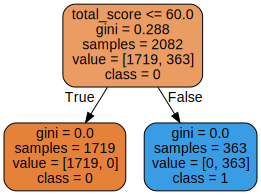

In [406]:
from sklearn.tree import export_graphviz

export_graphviz(
        school_clf,
        out_file="school.dot",
        feature_names=['teaching','international','research','citations','income','num_students','student_staff_ratio','international_students','total_score'],
        class_names=['0', '1'],
        rounded=True,
        filled=True
    )

import graphviz
with open("school.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='school', directory='images/decision_trees', cleanup=True)
dot

In [408]:
#0과1  Classification